# Классификация комментариев на позитивные и негативные

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Используеые-модули" data-toc-modified-id="Используеые-модули-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Используеые модули</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Преобработка-данных" data-toc-modified-id="Преобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Преобработка данных</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Очистка-текста" data-toc-modified-id="Очистка-текста-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Очистка текста</a></span></li><li><span><a href="#Удаление-стоп-слов." data-toc-modified-id="Удаление-стоп-слов.-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Удаление стоп слов.</a></span></li></ul></li><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Расчет-TF-IDF" data-toc-modified-id="Расчет-TF-IDF-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Расчет TF-IDF</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LinearSVC" data-toc-modified-id="LinearSVC-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LinearSVC</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

### Используеые модули

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Загрузка данных

In [2]:
data = pd.read_csv()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
text     159571 non-null object
toxic    159571 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


None

,toxic
count,159571.000000
mean,0.101679
std,0.302226
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


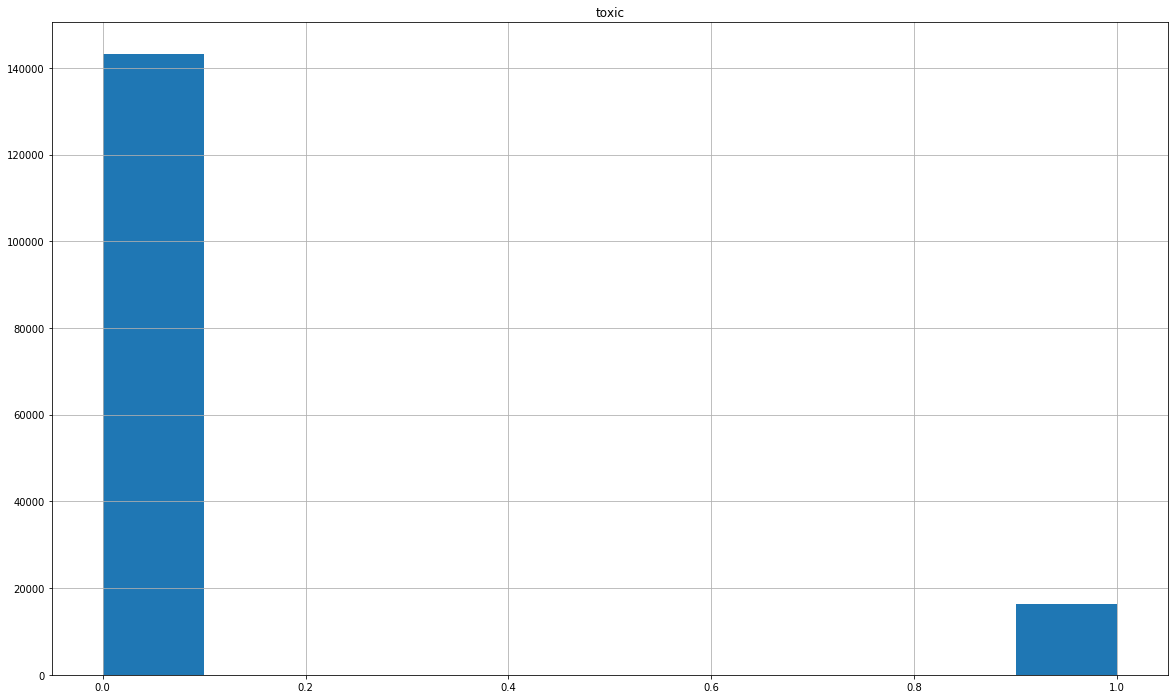

Количество дубликатов в DataFrame: 0


In [3]:
def information(DataFrame):
    display(DataFrame.head(10))
    display(DataFrame.info())
    display(DataFrame.describe())
    DataFrame.hist(figsize=(20,12))
    plt.show()
    print('Количество дубликатов в DataFrame:', DataFrame.duplicated().sum())
information(data)

In [4]:
data['toxic'].value_counts()

0    143346
1     16225
Name: toxic, dtype: int64

1. DataFrame содержат информацию о 159571 объектах;
2. Наблюдается дисбаланс классов. В выборке присутсвуют только 10% токсичных правок. Необходимо это учесть при разделении выборок на обучающую и тестовую;
3. Пропущенных значений нет.

### Преобработка данных

#### Лемматизация 

Проведем лемматизацию комментариев.

In [5]:
def lemmatize(text):  
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text)])

data['text_ml'] = data['text'].apply(lemmatize)
data.head()

,text,toxic,text_ml
0,Explanation\nWhy the edits made under my usern...,0,Explanation Why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,D'aww ! He match this background colour I 'm s...
2,"Hey man, I'm really not trying to edit war. It...",0,"Hey man , I 'm really not trying to edit war ...."
3,"""\nMore\nI can't make any real suggestions on ...",0,`` More I ca n't make any real suggestion on i...
4,"You, sir, are my hero. Any chance you remember...",0,"You , sir , are my hero . Any chance you remem..."


#### Очистка текста

Удалим ненужные символы.

In [6]:
def clear_text(text):
    return " ".join(re.sub(r'[^a-zA-Z]', ' ', text).split())

data['text_ml'] = data['text_ml'].apply(clear_text)
data.head()

,text,toxic,text_ml
0,Explanation\nWhy the edits made under my usern...,0,Explanation Why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,D aww He match this background colour I m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,Hey man I m really not trying to edit war It s...
3,"""\nMore\nI can't make any real suggestions on ...",0,More I ca n t make any real suggestion on impr...
4,"You, sir, are my hero. Any chance you remember...",0,You sir are my hero Any chance you remember wh...


Приведем все к нижнему регистру.

In [7]:
data['text_ml'] = data['text_ml'].str.lower()
data.head()

,text,toxic,text_ml
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour i m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i ca n t make any real suggestion on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...


#### Удаление стоп слов.

Удалим стоп слова.

In [8]:
def stop_words(text):
    return " ".join([word for word in text.split() if word not in stopwords])

data['text_ml'] = data['text_ml'].apply(stop_words)
data.head()

,text,toxic,text_ml
0,Explanation\nWhy the edits made under my usern...,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,aww match background colour seemingly stuck th...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really trying edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",0,ca n make real suggestion improvement wondered...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page


### Разделение выборок

In [9]:
data_ml = data.copy()
data_ml = data_ml.drop('text', axis=1)

Разделим исходную выборку на обучающую и тестовую выборки в следующей пропорции:
* Обучающая выборка - 75%;
* Тестовая выборка - 25%.

Так как у нас присутствует дисбаланс классов, то будем использовать параметр `stratify`, который разделит выборки таким образом, чтобы в обучающей и тестовой выборках сохранялись соотношения классов.

In [10]:
train, test = train_test_split(data_ml, test_size = 0.25, stratify = data_ml['toxic'], random_state=12345)

Проверим размерности выборок.

In [11]:
print('Размерность train:', len(train))
print('Размерность test:', len(test))

Размерность train: 119678
Размерность test: 39893


Разделим признаки и целевой признак.

In [12]:
corpus_train = train['text_ml'].astype('U')
corpus_test  = test['text_ml'].astype('U')

y_train = train['toxic']
y_test  = test['toxic']

### Расчет TF-IDF

Обучение запустим только на тренировочной выборке.

In [13]:
count_tf_idf = TfidfVectorizer()
tf_idf = count_tf_idf.fit(corpus_train) 

X_train = tf_idf.transform(corpus_train)
X_test = tf_idf.transform(corpus_test)

### Вывод
1. Изучили данные, содержащиеся в файле;
2. Проверили данные на наличие дубликатов, пропущенных значений;
3. Провели предобработку данных:
 * Лемматизацию;
 * Очитили текста от лишних символов;
 * Удалили стоп слова;
4. Разделили данные на тренировочные и тестовые;
5. Рассчитали TD-IDF.

## Обучение

Обучим 4 модели:
* LogisticRegression;
* DecisionTreeClassifier;
* RandomForestClassifier;
* LinearSVC.

In [14]:
data_result_list = []

### LogisticRegression

In [15]:
%%time
# Время обучения 10 сек
model_LG = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')
model_LG.fit(X_train, y_train)
f1_score_LG = f1_score(y_test, model_LG.predict(X_test))
print('F1 = {:.3f}'.format(f1_score_LG))

data_result_list.append({'Модель': 'LogisticRegression', 'F1': f1_score_LG})
data_result_pd = pd.DataFrame(data_result_list)

F1 = 0.756
CPU times: user 8.73 s, sys: 5.71 s, total: 14.4 s
Wall time: 14.5 s


### DecisionTreeClassifier

In [16]:
%%time
# Время обучения 3 мин
model_DTC = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_DTC.fit(X_train, y_train)
f1_score_DTC = f1_score(y_test, model_DTC.predict(X_test))
print('F1 = {:.3f}'.format(f1_score_DTC))

data_result_list.append({'Модель': 'DecisionTreeClassifier', 'F1': f1_score_DTC})
data_result_pd = pd.DataFrame(data_result_list)

F1 = 0.658
CPU times: user 2min 37s, sys: 32.4 ms, total: 2min 37s
Wall time: 2min 38s


### RandomForestClassifier

In [17]:
%%time
# Время обучения 1 мин
model_RFC = RandomForestClassifier(random_state=12345, class_weight='balanced')
model_RFC.fit(X_train, y_train)
f1_score_RFC = f1_score(y_test, model_RFC.predict(X_test))
print('F1 = {:.3f}'.format(f1_score_RFC))

data_result_list.append({'Модель': 'RandomForestClassifier', 'F1': f1_score_RFC})
data_result_pd = pd.DataFrame(data_result_list)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1 = 0.603
CPU times: user 1min 2s, sys: 13.1 ms, total: 1min 2s
Wall time: 1min 3s


### LinearSVC

In [18]:
%%time
# Время обучения 1 сек
model_SVC = LinearSVC(random_state=12345)
model_SVC.fit(X_train, y_train)
f1_score_SVC = f1_score(y_test, model_SVC.predict(X_test))
print('F1 = {:.3f}'.format(f1_score_SVC))

data_result_list.append({'Модель': 'LinearSVC', 'F1': f1_score_SVC})
data_result_pd = pd.DataFrame(data_result_list)

F1 = 0.783
CPU times: user 941 ms, sys: 0 ns, total: 941 ms
Wall time: 959 ms


### Подбор гиперпараметров

In [19]:
data_result_pd

,Модель,F1
0,LogisticRegression,0.756242
1,DecisionTreeClassifier,0.657574
2,RandomForestClassifier,0.602676
3,LinearSVC,0.783255


Лучшей моделью оказалась **LinearSVC** со значением **F1 = 0.783**. Попробуем улучшить это значение путем подбора гиперпарамтеров. Для этого будем использовать `GridSearchCV()`.

In [20]:
%%time
# Время выполнения около 6 минут
f1 = make_scorer(f1_score)
parametrs = { 'class_weight': [None, 'balanced'],
              'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
              'max_iter': range (100,1001, 100)}
model = LinearSVC(random_state=12345)
grid = GridSearchCV(model, parametrs, cv=3, scoring=f1)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CPU times: user 5min 58s, sys: 39.8 ms, total: 5min 58s
Wall time: 6min 3s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=12345, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': range(100, 1001, 100),
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score), verbose=0)

Наулучшая модель получилась со следующими гиперпараметрами:

In [21]:
print(grid.best_params_)

{'class_weight': None, 'max_iter': 100, 'tol': 0.01}


Посчитаем значение F1 для модели с науличшими гиперпараметрами.

In [22]:
f1_score = f1_score(y_test, grid.predict(X_test))
print('F1 = {:.3f}'.format(f1_score))

F1 = 0.783


В результате видим, что значение метрики с помощью подбора гиперпарамтеров улучшить не удалось. Но полученное значение F1 = 0.783 удовлетворяет условиям ТЗ (F1 > 0.75).

### Вывод
Обучили 4 модели:
* LogisticRegression;
* DecisionTreeClassifier;
* RandomForestClassifier;
* LinearSVC.  

Лучшей оказалась модель **LinearSVC** со значением **F1 = 0.783** и гиперпараметрами **'class_weight': None, 'max_iter': 100, 'tol': 0.01**.

## Выводы

В результате проделанной работы удалось: 

Обучить 4 модели:
* LogisticRegression;
* DecisionTreeClassifier;
* RandomForestClassifier;
* LinearSVC.  

Получили следующие результаты метрики F1 для разных моделей:

**Модель**  | **F1** |
:-------------: | :-------------: |
LogisticRegression      | 0.756242 |
DecisionTreeClassifier      | 0.657574 |
RandomForestClassifier | 0.602676 |
LinearSVC | **0.783255** |

Лучшей оказалась модель **LinearSVC** со значением **F1 = 0.783**.

Подобрали гиперпаратры для **LinearSVC**. Лучшее значение F1 = 0.783 показала модель со следующими гипермараметрами:
* class_weight = None; 
* max_iter = 100; 
* tol = 0.01.